# Example of optimizing a convex function

# Goal is to test the objective values found by Mango using Random Search

In [1]:
from mango.tuner import Tuner
from scipy.stats import uniform


def get_param_dict():
    param_dict = {
        'x': uniform(-5000, 10000)
    }
    return param_dict
    
def objfunc(args_list):
    results = []
    for hyper_par in args_list:
        x = hyper_par['x']
        result = -(x**2)
        results.append(result)
    return results


def get_conf_50():
    conf = dict()
    conf['batch_size'] = 49
    conf['initial_random'] = 1
    conf['num_iteration'] = 1
    conf['optimizer'] = "Random"
    return conf

def get_conf_100():
    conf = dict()
    conf['batch_size'] = 99
    conf['initial_random'] = 1
    conf['num_iteration'] = 1
    conf['optimizer'] = "Random"
    return conf

def get_conf_200():
    conf = dict()
    conf['batch_size'] = 199
    conf['initial_random'] = 1
    conf['num_iteration'] = 1
    conf['optimizer'] = "Random"
    return conf

def get_conf_500():
    conf = dict()
    conf['batch_size'] = 499
    conf['initial_random'] = 1
    conf['num_iteration'] = 1
    conf['optimizer'] = "Random"
    return conf


def get_optimal_x():
    param_dict = get_param_dict()
    conf_50 = get_conf_50()
    tuner_50 = Tuner(param_dict, objfunc,conf_50)
    
    conf_100 = get_conf_100()
    tuner_100 = Tuner(param_dict, objfunc,conf_100)
    
    conf_200 = get_conf_200()
    tuner_200 = Tuner(param_dict, objfunc,conf_200)
    
    conf_500 = get_conf_500()
    tuner_500 = Tuner(param_dict, objfunc,conf_500)
    
    
    results_50 = tuner_50.maximize()
    results_100 = tuner_100.maximize()
    results_200 = tuner_200.maximize()
    results_500 = tuner_500.maximize()
    
    return results_50, results_100, results_200 , results_500

In [2]:
Store_Optimal_X = []
Store_Results = []
num_of_tries = 100

In [3]:
for i in range(num_of_tries):
    results_50, results_100, results_200 , results_500 = get_optimal_x()
    Store_Results.append([results_50, results_100, results_200 , results_500])
    Store_Optimal_X.append([results_50['best_params']['x'],results_100['best_params']['x'],results_200['best_params']['x'],results_500['best_params']['x']])
    print(i,":",[results_50['best_params']['x'],results_100['best_params']['x'],results_200['best_params']['x'],results_500['best_params']['x']])

0 : [30.999964707904837, -44.908072425066166, 2.272088214096584, 21.59156553255343]
1 : [26.425410664845003, -11.619671039140485, -21.47974860102022, 28.027305280763358]
2 : [77.29314723225889, -33.21007815464327, 6.044036593003511, 28.43145753153476]
3 : [27.02401703027226, -3.490682223406111, 30.511867845372763, -13.681680495132241]
4 : [-49.085147263371255, 21.82859498461312, 31.69106182642281, -0.24622757955967245]
5 : [-143.3627139949749, 80.70399224665562, 18.88379844426163, 25.830095003795577]
6 : [-66.56188324683353, 22.849449432899746, 36.57608662422808, 13.270465103093557]
7 : [8.371053457613925, -141.1975644410204, 14.64956629860535, 2.7911735298721396]
8 : [250.4889775194888, 111.79097973434727, 16.714060880575744, -4.716149028609834]
9 : [-51.86371596378012, 18.426727244429458, -23.58380275482432, -0.2508400095421166]
10 : [115.9107067212899, -29.230618374271216, -14.0516286059501, 0.47521589721327473]
11 : [-24.377319089678167, -79.7639528188156, 38.9855266543791, 3.32210

99 : [56.377146349536815, 60.382218350161565, 98.76670729423404, 9.040009815555095]


In [8]:
import numpy as np
Store_Optimal_X=np.array(Store_Optimal_X)

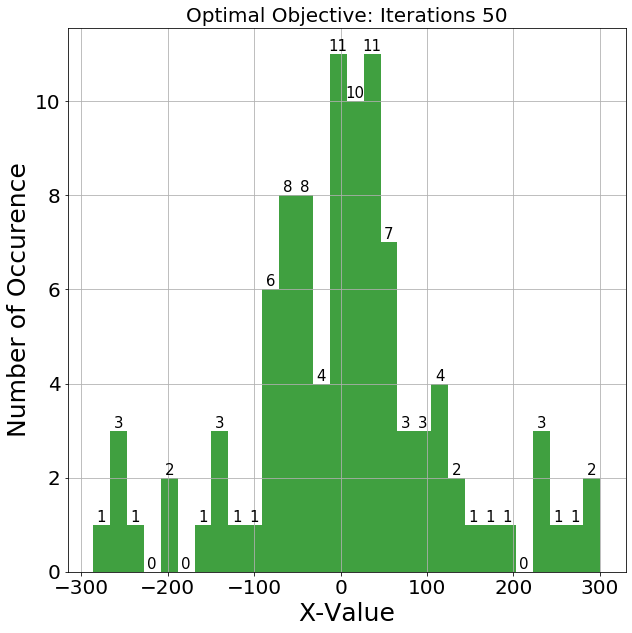

In [16]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(Store_Optimal_X[:,0], 30, facecolor='g', alpha=0.75)
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=15)
plt.xlabel('X-Value',fontsize=25)
plt.ylabel('Number of Occurence',fontsize=25)
plt.title('Optimal Objective: Iterations 50',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
autolabel(patches)
plt.show()

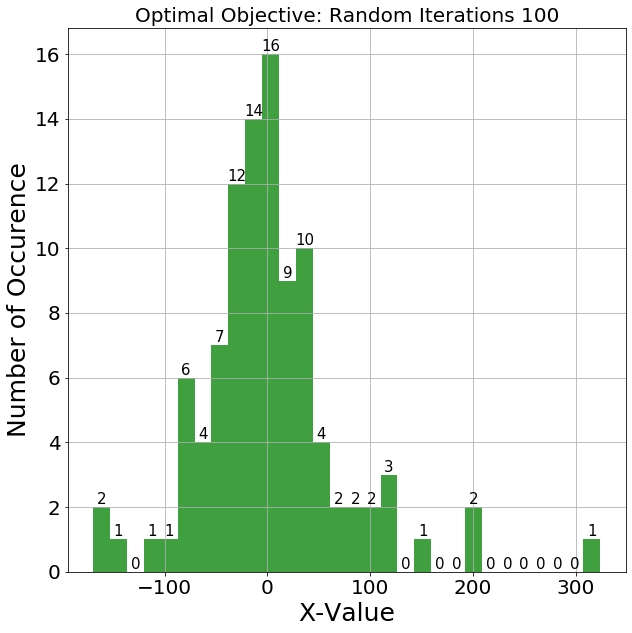

In [17]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(Store_Optimal_X[:,1], 30, facecolor='g', alpha=0.75)
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=15)
plt.xlabel('X-Value',fontsize=25)
plt.ylabel('Number of Occurence',fontsize=25)
plt.title('Optimal Objective: Random Iterations 100',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
autolabel(patches)
plt.show()

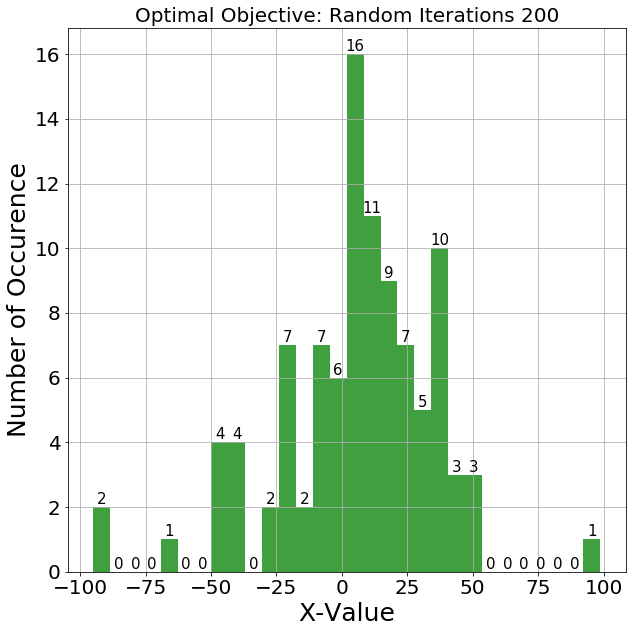

In [18]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(Store_Optimal_X[:,2], 30, facecolor='g', alpha=0.75)
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=15)
plt.xlabel('X-Value',fontsize=25)
plt.ylabel('Number of Occurence',fontsize=25)
plt.title('Optimal Objective: Random Iterations 200',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
autolabel(patches)
plt.show()

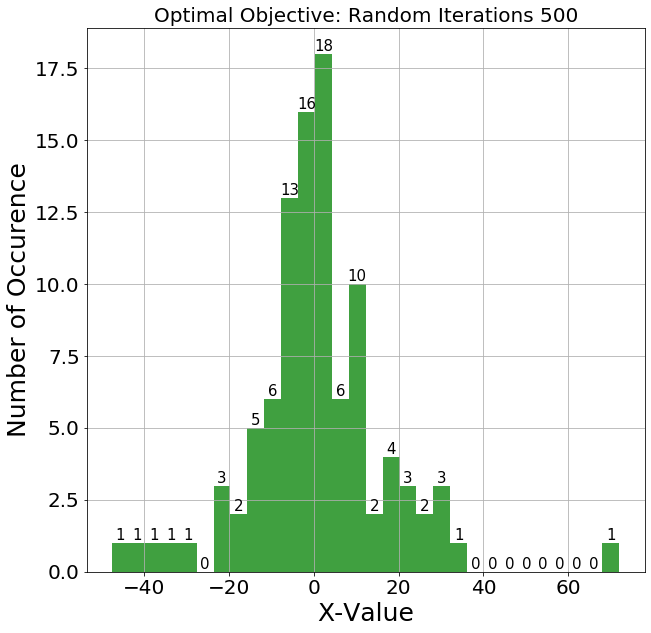

In [20]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(Store_Optimal_X[:,3], 30, facecolor='g', alpha=0.75)
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=15)
plt.xlabel('X-Value',fontsize=25)
plt.ylabel('Number of Occurence',fontsize=25)
plt.title('Optimal Objective: Random Iterations 500',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
autolabel(patches)
plt.show()